In [11]:
import gym
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
problem = "Pendulum-v0"
env = gym.make(problem)

In [3]:
from ddpg import ActorCritic

In [4]:
actor_critic = ActorCritic(env.observation_space.shape, env.action_space.shape)

Actor Network Summary: 
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense (Dense)                (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
_________________________________________________________________
gaussian_noise (GaussianNois (None, 1)                 0         
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________
Critic Network Summary: 
Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to   

In [5]:
train_param = {
    "env": env, 
    "num_eps":100,
    "actor_lr": 0.001,
    "critic_lr": 0.001,
}

In [6]:
rewards = actor_critic.train(**train_param)

Episode 0, reward: [-848.89465]
Episode 1, reward: [-1070.0604]
Episode 2, reward: [-1313.9572]
Episode 3, reward: [-1492.7798]
Episode 4, reward: [-1476.3612]
Episode 5, reward: [-1496.5359]
Episode 6, reward: [-1443.7761]
Episode 7, reward: [-857.44037]
Episode 8, reward: [-994.13806]
Episode 9, reward: [-1463.455]
Episode 10, reward: [-863.42084]
Episode 11, reward: [-871.13696]
Episode 12, reward: [-1032.4083]
Episode 13, reward: [-1505.984]
Episode 14, reward: [-1171.094]
Episode 15, reward: [-1731.6984]
Episode 16, reward: [-1322.7864]
Episode 17, reward: [-762.10114]
Episode 18, reward: [-1344.793]
Episode 19, reward: [-1000.3835]
Episode 20, reward: [-1661.2698]
Episode 21, reward: [-1161.9182]
Episode 22, reward: [-1054.7838]
Episode 23, reward: [-1166.0719]
Episode 24, reward: [-1118.1902]
Episode 25, reward: [-1861.3573]
Episode 26, reward: [-899.5349]
Episode 27, reward: [-1876.7417]
Episode 28, reward: [-1750.1238]
Episode 29, reward: [-1285.7692]
Episode 30, reward: [-122

array([ -848.89465, -1070.0604 , -1313.9572 , -1492.7798 , -1476.3612 ,
       -1496.5359 , -1443.7761 ,  -857.44037,  -994.13806, -1463.455  ,
        -863.42084,  -871.13696, -1032.4083 , -1505.984  , -1171.094  ,
       -1731.6984 , -1322.7864 ,  -762.10114, -1344.793  , -1000.3835 ,
       -1661.2698 , -1161.9182 , -1054.7838 , -1166.0719 , -1118.1902 ,
       -1861.3573 ,  -899.5349 , -1876.7417 , -1750.1238 , -1285.7692 ,
       -1228.2622 , -1771.6155 , -1550.812  , -1709.1333 , -1872.8085 ,
       -1868.869  , -1594.2317 , -1785.4218 , -1587.1503 , -1446.6799 ,
       -1127.071  , -1627.3942 , -1202.8176 , -1598.3317 , -1491.8376 ,
       -1529.8689 , -1773.8251 , -1730.4526 , -1696.9481 , -1647.1642 ,
       -1592.9006 , -1678.0658 , -1680.7906 , -1625.3378 , -1444.6473 ,
       -1528.9708 , -1559.4987 , -1392.1411 , -1520.1407 , -1486.2709 ,
       -1444.0815 , -1344.9926 , -1511.5502 , -1303.1359 , -1270.7134 ,
       -1262.5565 ,  -848.86694, -1432.1732 , -1179.5901 , -1181

In [17]:
problem = "Pendulum-v0"
env = gym.make(problem)
actor_critic.test(env)

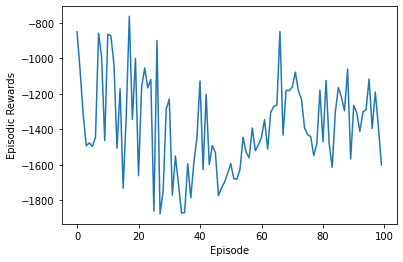

In [16]:
plt.plot(np.squeeze(np.array(rewards)))
plt.xlabel("Episode")
plt.ylabel("Episodic Rewards")
plt.show()

array([-0.13641656, -0.99065156,  0.23321824])

Actor Network Summary: 
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense (Dense)                (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
_________________________________________________________________
gaussian_noise (GaussianNois (None, 1)                 0         
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________
Critic Network Summary: 
Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to   

Episode 0, reward: [-1792.5974]
Episode 1, reward: [-1834.559]


ModuleNotFoundError: No module named 'matplotlib'